In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

In [4]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("diabetes.csv")

In [5]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

#pima_df[~pima_df.applymap(np.isreal).all(1)]

In [8]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
#pima_df = pima_df.fillna(pima_df.median())
#pima_df

In [9]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
# Let us look at the target column which is 'Outcome' to understand how the data is distributed amongst the various values
pima_df.groupby(["Outcome"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [10]:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right

In [11]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

#pima_df_attr = pima_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(pima_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\pima_pairpanel.png')

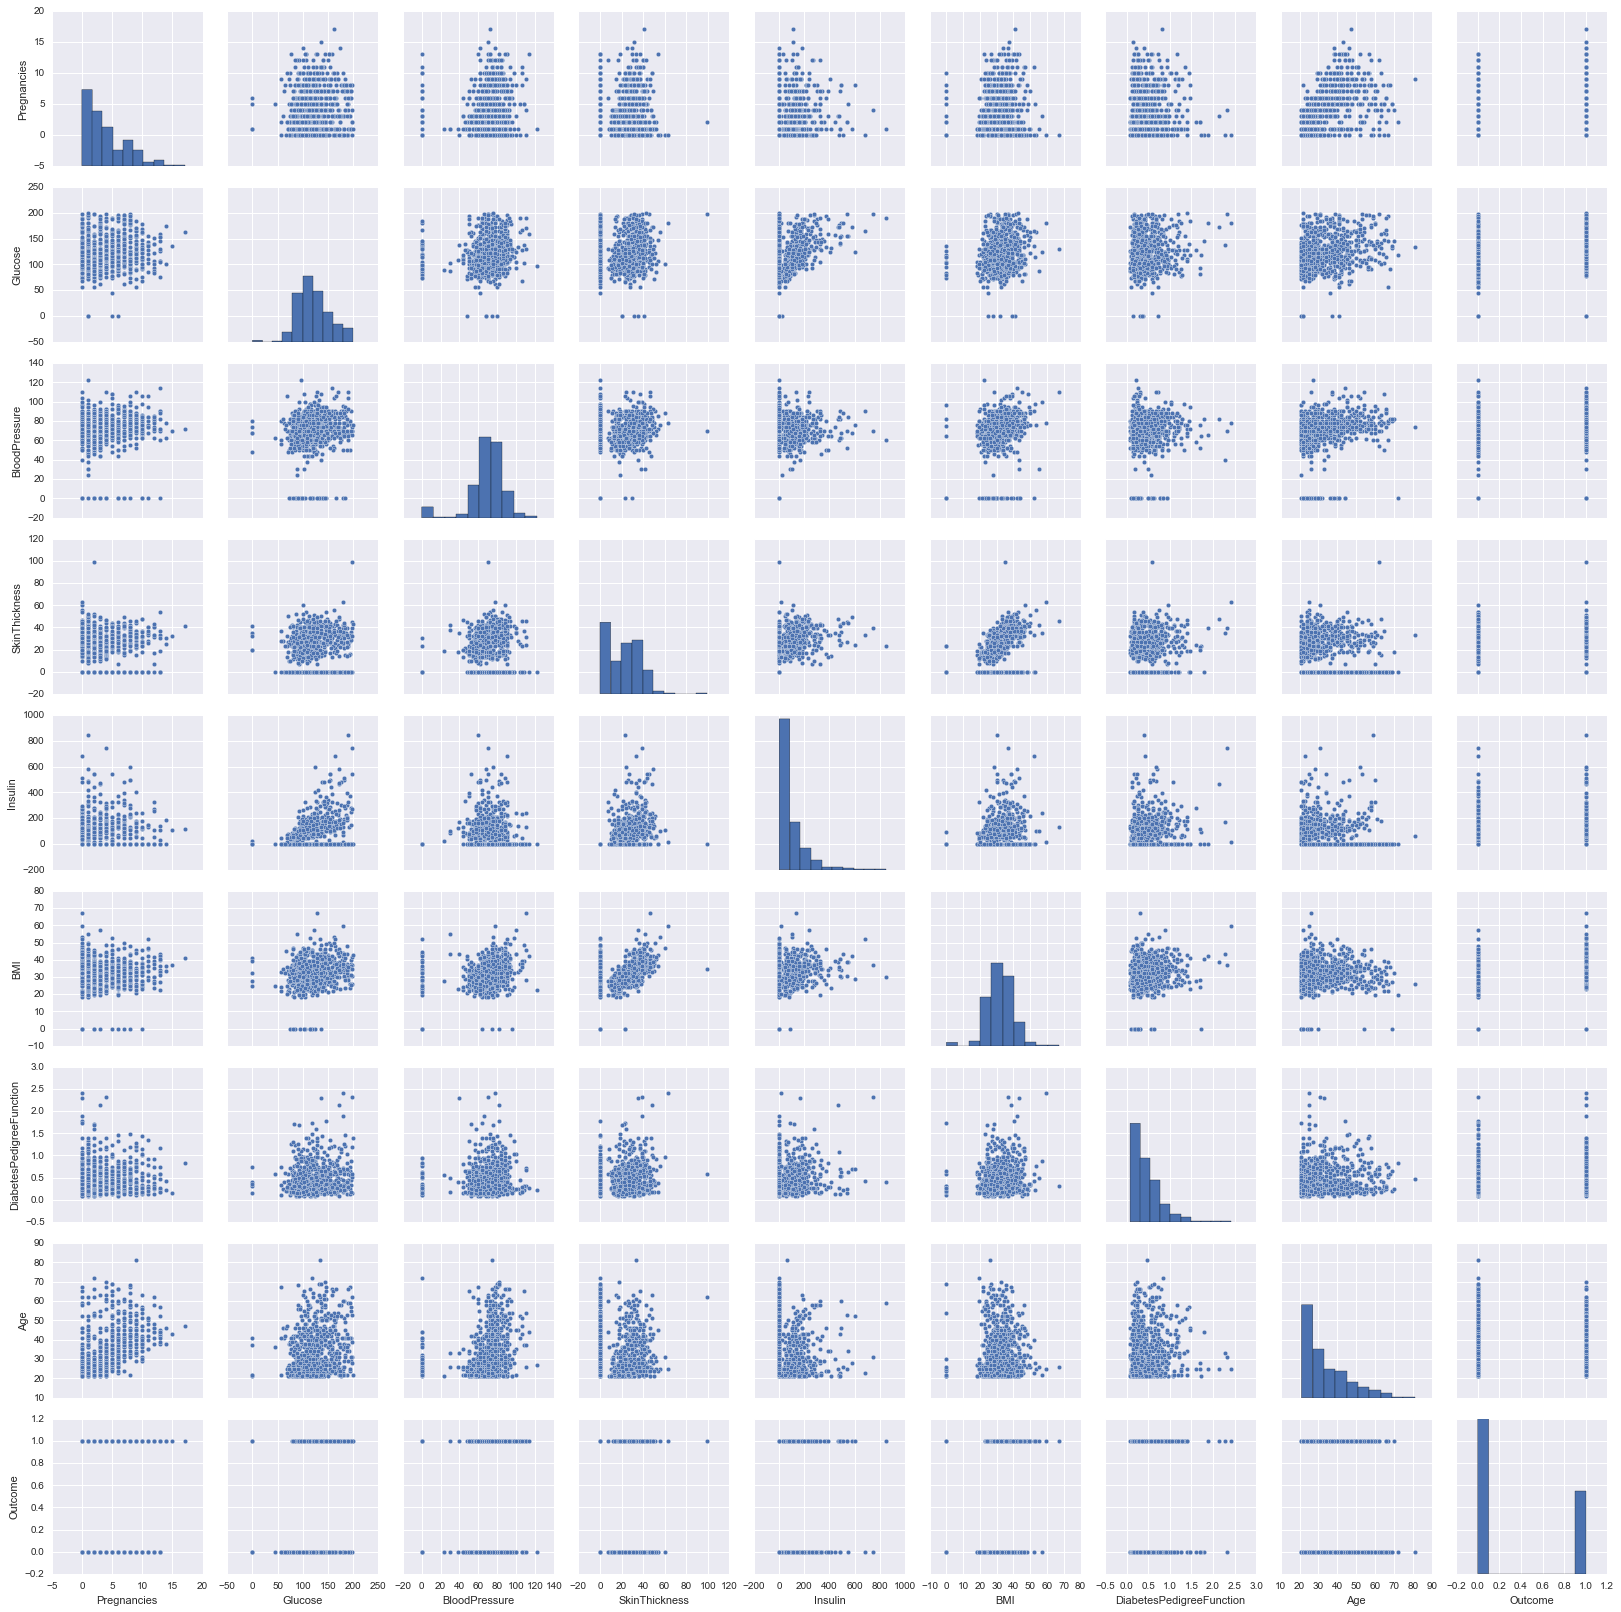

In [13]:
# Pairplot using sns

sns.pairplot(pima_df)

In [13]:
# Attributes which look normally distributed (glucose, BloodPressure, SkinThickness, and BMI).
# Some of the attributes look like they may have an exponential distribution (Pregnancies, Insulin, DiabetesPedigreeFunction, Age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.

In [28]:
array = pima_df.values
#X = array[:,(1,2,3,5)] # select all rows and first 8 columns which are the attributes
X = array[:,0:7]
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [29]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.770562770563
[[132  15]
 [ 38  46]]


In [30]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [31]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [32]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.779220779221
[[134  13]
 [ 38  46]]


    Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 46

True Negatives (TN): we correctly predicted that they don't have diabetes 134

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 13
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 38
Falsely predict negative Type II error